In [1]:
import sys
import time
import numpy as np
import pickle

In [2]:
max_size = 21
max_length = 20

In [3]:
with open("./pkls/raw_hist_list.pkl", "rb") as f:
    raw_hist_list = pickle.load(f)
# with open("./pkls/ignis_hist_list.pkl", "rb") as f:
#     ignis_hist_list = pickle.load(f)
# with open("./pkls/delta_hist_list.pkl", "rb") as f:
#     delta_hist_list = pickle.load(f)
with open("./pkls/lnp_hist_list.pkl", "rb") as f:
    lnp_hist_list = pickle.load(f)
# with open("./pkls/mooney01_hist_list.pkl", "rb") as f:
#     mooney01_hist_list = pickle.load(f)
# with open("./pkls/nation_hist_list.pkl", "rb") as f:
#     nation_hist_list = pickle.load(f)

In [4]:
sys.path.append("../../libs_bell/")
from lib_graph_states import adjacency_list_for_path_graph, list_to_matrix
F_list = [3 * i + 1 for i in range(max_size // 3)] # subset of focused vertices of graph size max_size
Fs = [F_list[:(n+1) // 3] for n in range(1, max_size + 1)] # subsets of focused vertices of graph size 1 to max_size
adj_lists = [adjacency_list_for_path_graph(n) for n in range(1, max_size + 1)] # adjacency list of graph size 1 to max_size
graphs = [list_to_matrix(adj_list) for adj_list in adj_lists] # adjacency matrix of graph size 1 to max_size
print("max_size:", max_size)
print("F_list:", F_list)

max_size: 21
F_list: [1, 4, 7, 10, 13, 16, 19]


In [5]:
from lib_path_graphs import correlations_of_path_graphs

In [6]:
corr_list, stddev_list, Es_list, Ds_list = correlations_of_path_graphs(adj_lists, Fs, raw_hist_list)

graph size: 1
skipped

graph size: 2
total correlation: 2.2076370893099537 

graph size: 3
total correlation: 3.956069091228253 

graph size: 4
total correlation: 4.689605822296093 

graph size: 5
total correlation: 6.353603021188891 

graph size: 6
total correlation: 8.44661147214243 

graph size: 7
total correlation: 9.259514744509524 

graph size: 8
total correlation: 10.727099894865647 

graph size: 9
total correlation: 12.735172668000882 

graph size: 10
total correlation: 13.46988523740269 

graph size: 11
total correlation: 14.847170803019491 

graph size: 12
total correlation: 16.534835815929572 

graph size: 13
total correlation: 17.291868052381503 

graph size: 14
total correlation: 18.393407985425267 

graph size: 15
total correlation: 19.063916466413684 

graph size: 16
total correlation: 20.345601339049484 

graph size: 17
total correlation: 20.738116066986716 

graph size: 18
total correlation: 22.139900017971765 

graph size: 19
total correlation: 23.144416302193527 

gr

In [7]:
# ignis_corr_list, ignis_stddev_list, ignis_Es_list, ignis_Ds_list = correlations_of_path_graphs(adj_lists, Fs, ignis_hist_list)

In [8]:
# delta_corr_list, delta_stddev_list, delta_Es_list, delta_Ds_list = correlations_of_path_graphs(adj_lists, Fs, delta_hist_list)

In [9]:
lnp_corr_list, lnp_stddev_list, lnp_Es_list, lnp_Ds_list = correlations_of_path_graphs(adj_lists, Fs, lnp_hist_list)

graph size: 1
skipped

graph size: 2
total correlation: 2.6378472205700607 

graph size: 3
total correlation: 5.31307510088642 

graph size: 4
total correlation: 5.6121801437164835 

graph size: 5
total correlation: 7.415917132124105 

graph size: 6
total correlation: 10.029904237627575 

graph size: 7
total correlation: 11.150393676667143 

graph size: 8
total correlation: 13.183785354057488 

graph size: 9
total correlation: 15.34799429601702 

graph size: 10
total correlation: 16.37976939832457 

graph size: 11
total correlation: 18.56342071654042 

graph size: 12
total correlation: 21.719707690397737 

graph size: 13
total correlation: 22.359724125671693 

graph size: 14
total correlation: 24.19433812899237 

graph size: 15
total correlation: 26.531214449898787 

graph size: 16
total correlation: 27.482405845194375 

graph size: 17
total correlation: 26.278049363961056 

graph size: 18
total correlation: 27.84416676753194 

graph size: 19
total correlation: 27.975802043464086 

gra

In [10]:
# mooney01_corr_list, mooney01_stddev_list, mooney01_Es_list, mooney01_Ds_list = correlations_of_path_graphs(adj_lists, Fs, mooney01_hist_list)

In [11]:
# nation_corr_list, nation_stddev_list, nation_Es_list, nation_Ds_list = correlations_of_path_graphs(adj_lists, Fs, nation_hist_list)

## plot correlations

In [12]:
c_bounds = [0] + [n + (n // 3) for n in range(2, max_size + 1)]
q_bounds = [0]
for n in range(2, max_size + 1):
    q_bounds.append( 2 * (np.sqrt(2) * 2 - 1) * (n // 3) + n - ((n + 1) // 3))
    if (n + 1) % 3 == 0:
        q_bounds[-1] += (np.sqrt(2) * 2 - 1)

In [13]:
from lib_plots import plot_correlations_lines, cut_corrs_list

In [14]:
corrs_list = [np.array(corr_list), 
              # np.array(ignis_corr_list),
              # np.array(delta_corr_list),
              np.array(lnp_corr_list),
              # np.array(mooney01_corr_list),
              # np.array(nation_corr_list),
             ]
stddevs_list = [np.array(stddev_list),
                # np.array(ignis_stddev_list),
                # np.array(delta_stddev_list),
                np.array(lnp_stddev_list),
                # np.array(mooney01_stddev_list),
                # np.array(nation_stddev_list),
               ]

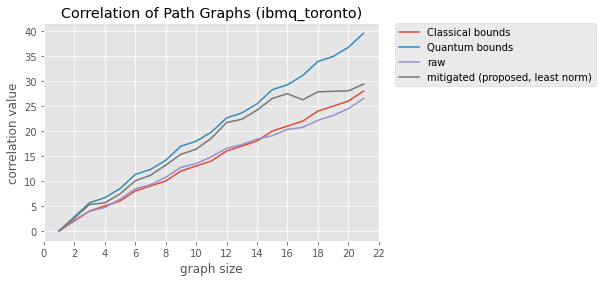

In [15]:
plot_correlations_lines(max_size, 
                        c_bounds, 
                        q_bounds, 
                        corrs_list,
                        stddevs_list,
                        ["raw", 
                         # "mitigated (ignis)", 
                         # "mitigated (proposed, delta)", 
                         "mitigated (proposed, least norm)", 
                         # "mitigated (Mooney et al., threshold = 0.1)",
                         # "mitigated (Nation et al., iterative)",
                        ], 
                        # ["*", "*", "*", "*", "*", "*"], 
                        "Correlation of Path Graphs (ibmq_toronto)")

In [16]:
with open("./pkls/corrs_stddevs_list.pkl", "wb") as f:
    pickle.dump([corrs_list, stddevs_list], f)